In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Classifier

In [4]:
from Classifier_new import Classifier
the_classifier = Classifier()

SVM 

Normalized confusion matrix


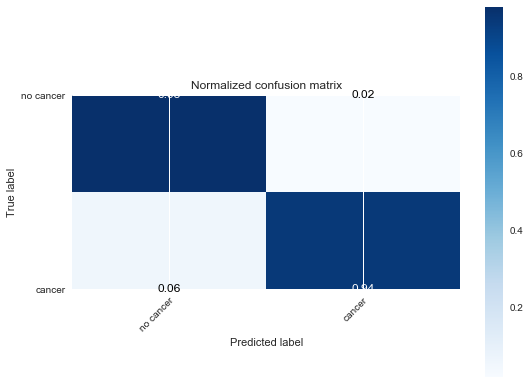

In [5]:
c_svm, y_pred, distances = the_classifier.svm(X_train, y_train, X_test, kernel='linear', C=1)
_  = the_classifier.plot_confusion_matrix(y_test, y_pred, np.array(['no cancer','cancer']),normalize=True)
_ = the_classifier.roc(y_test, distances)

In [6]:
the_classifier.metrics(y_test, y_pred)

{'accuracy_score': 0.958041958041958,
 'f1_score': array([0.94545455, 0.96590909]),
 'precision_score': array([0.9122807 , 0.98837209]),
 'recall_score': array([0.98113208, 0.94444444])}

#### Multi-class

##### multi-label binary representation k-dim

In [7]:
from sklearn.datasets import make_multilabel_classification

In [8]:
X, Y = make_multilabel_classification(n_classes=2, n_labels=1,
                                      allow_unlabeled=True,
                                      random_state=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [10]:
from Classifier import Classifier
the_classifier = Classifier()

In [11]:
c_svm, y_pred, distances = the_classifier.svm_multi(X_train, y_train, X_test, kernel='linear', C=1)

In [12]:
the_classifier.metrics(y_test, y_pred, average='micro')

{'accuracy_score': 0.8,
 'f1_score': 0.8500000000000001,
 'precision_score': 0.8095238095238095,
 'recall_score': 0.8947368421052632}

##### multi-class single label 1-dim

In [37]:
from sklearn import datasets
X, y = datasets.load_iris(return_X_y=True)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [39]:
c_svm, y_pred, distances = the_classifier.svm_multi(X_train, y_train, X_test, kernel='linear', C=1)

In [40]:
the_classifier.metrics(y_test, y_pred, average='micro')

{'accuracy_score': 0.9210526315789473,
 'f1_score': 0.9210526315789473,
 'precision_score': 0.9210526315789473,
 'recall_score': 0.9210526315789473}

#### Balance unbalanced data

In [41]:
c_svm, y_pred, distances = the_classifier.svm_multi(X_train, y_train, X_test, kernel='linear', C=1, class_weight='balanced')

In [42]:
the_classifier.metrics(y_test, y_pred, average='micro')

{'accuracy_score': 0.9736842105263158,
 'f1_score': 0.9736842105263158,
 'precision_score': 0.9736842105263158,
 'recall_score': 0.9736842105263158}